In [1]:
#Import libraries we will use in the analysis
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Set starting and ending date for dowloading data from Yahoo Finance
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

In [3]:
#Download data for Bitcoin and Ether
btc = yf.download('BTC-USD', start, end, progress=False)
eth = yf.download('ETH-USD', start, end, progress=False)

In [4]:
#Show in the screen the first few observations for Bitcoin
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [5]:
#Show in the screen the last few observations for Bitcoin
btc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-22,18534.650391,19456.910156,18415.591797,19413.550781,19413.550781,41135767926
2022-09-23,19412.400391,19464.671875,18617.552734,19297.638672,19297.638672,38896078052
2022-09-24,19296.990234,19310.197266,18861.974609,18937.011719,18937.011719,26149643168
2022-09-25,18936.310547,19134.732422,18696.468750,18802.097656,18802.097656,23359966112
2022-09-26,18803.900391,19274.873047,18721.285156,19222.671875,19222.671875,44148798321


In [6]:
#Check how many observations for year 2019
len(btc[(btc.index.year>2018) & (btc.index.year<2020)])

365

In [7]:
#Compute daily returns use the discrete formula for Bitcoin and Ether 
btc['btc_return']=btc['Close']/btc['Close'].shift(1)-1 
eth['eth_return']=eth['Close']/eth['Close'].shift(1)-1

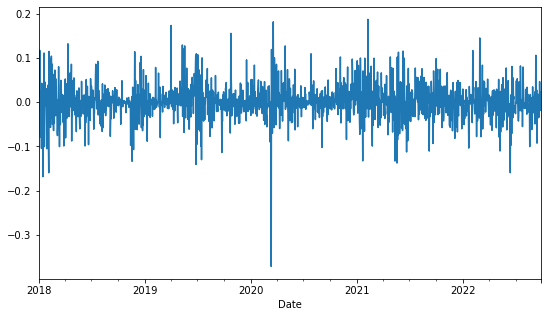

In [8]:
#Plot daily returns for Bitcoin
btc['btc_return'].plot(figsize=(9,5))
plt.show()

In [9]:
#Compute the mean daily return for Bitcoin
btc['btc_return'].mean()

0.0009713184784825894

In [10]:
#Compute annual average return for Bitcoin using average daily return and compounding formula
(1+btc['btc_return'].mean())**365

1.4252670143885062

In [11]:
#Recompute daily returns for Bitcoin and Ether but using the logarithmic formula (continuous time)
btc['btc_log_return']=np.log(btc['Close'])-np.log(btc['Close'].shift(1)) 
eth['eth_log_return']=np.log(eth['Close'])-np.log(eth['Close'].shift(1)) 

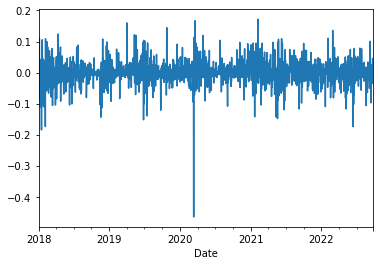

In [12]:
#Plot daily returns computed with logarithmic formula for Bitcoin
btc['btc_log_return'].plot()
plt.show()

In [13]:
#Daily standard deviation
btc['btc_log_return'].std()

0.0395792991256533

In [14]:
#Compute daily average return for Bitcoin
btc['btc_log_return'].mean()

0.0001977001387126849

In [15]:
#Compute daily average return for Ether
eth['eth_log_return'].mean()

0.00031643255065485104

In [16]:
#Compute standard deviation of daily returns for Bitcoin
btc['btc_log_return'].std()

0.0395792991256533

In [17]:
#Compute standard deviation of daily returns for Ether
eth['eth_log_return'].std()

0.05138637771794402

In [18]:
#Compute annual return using average logarithmic daily returns for Bitcoin
btc['btc_log_return'].mean()*365

0.07216055063013

In [19]:
#Compute annual standard deviation of daily logarithmic returns for Bitcoin 
#(T is to the power of 365 because the standard deviation is the square root of the variance)
btc['btc_log_return'].std()*(365**0.5)

0.7561614480628115

In [20]:
#Creat a new dataframe with only logarithmic returns for Bitcoin and Ether
Returns = pd.concat([btc['btc_log_return'],eth['eth_log_return']], axis=1)

In [21]:
#Compute the covariance of daily returns on Bitcoin and Ether
Returns.cov()

,btc_log_return,eth_log_return
btc_log_return,0.001567,0.001685
eth_log_return,0.001685,0.002641


In [22]:
#Compute the correlation of daily returns on Bitcoin and Ether
Returns.corr()

,btc_log_return,eth_log_return
btc_log_return,1.000000,0.828589
eth_log_return,0.828589,1.000000


In [23]:
#Compute and print the Sharpe ratio for both Bitcoin and Ether
print(Returns['btc_log_return'].mean()/Returns['btc_log_return'].std())
print(Returns['eth_log_return'].mean()/Returns['eth_log_return'].std())

0.004995038898618235
0.006157907303599519


In [24]:
#Create a new dataframe called PT with Bitcoin adjusted closing prices (Adj Close)
PT = pd.DataFrame(data=btc['Adj Close']) 

In [25]:
#Rename the column from 'Adj Close' to 'btc_price' 
PT.rename(columns = {'Adj Close':'btc_price'}, inplace = True)

In [26]:
#Expand the data frame PT by adding another column containing the adjusted closing price of Ether
PT = pd.concat([PT,eth['Adj Close']], axis=1)

In [27]:
#Rename the added column from 'Adj Close' to 'eth_price' 
PT.rename(columns = {'Adj Close':'eth_price'}, inplace = True)

In [28]:
#Normalize prices by diving the prices of each security by the first price in the data sample for the same security. 
#The normalized prices will be added as new coulmns to the PT dataframe
PT['btc_price_nor']=PT['btc_price']/PT.iloc[0]['btc_price']
PT['eth_price_nor']=PT['eth_price']/PT.iloc[0]['eth_price']

In [29]:
#We now create two arrays. The first contains the identifier for the investment security: Bitcoin and Ether.
#The second specifies the share of the investment in the two securities. We assume 50% in Bitcoin and 50% in Ether.
#These two arrays will be used to compute the value and return of the portfolio
crypto_type=['btc','eth']
shares=np.ones(len(crypto_type))/len(crypto_type)

In [30]:
#Compute the value of the portfolio. This is the mean of the prices of Bitcoin and Ether, weithed by the portfolio shares.
#Since we have two investment possibilities (Bitcoin and Ether), the loop is repeated twice. 
#The mean value of the portfolio is stored in a new column called 'ave_price' 
#We start adding the column containing, initially, all zeros. We then add the value invested in Bitcoin and then the
#the value invested in Ether
PT.loc[:,'ave_price']=0
num_shr=0
for i in crypto_type:
    PT.loc[:,'ave_price']=PT['ave_price']+PT[i+'_price_nor']*shares[num_shr]
    num_shr=num_shr+1

In [31]:
#We now compute the log-returns for Bitcoin, Ether, and the Portfolio with 50% Bitcoin and 50% Ether
PT['btc_ret']=np.log(PT['btc_price_nor'])-np.log(PT['btc_price_nor'].shift(1)) 
PT['eth_ret']=np.log(PT['eth_price_nor'])-np.log(PT['eth_price_nor'].shift(1))
PT['por_ret']=np.log(PT['ave_price'])-np.log(PT['ave_price'].shift(1))